In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def create_data(n):
 x1 = array([i/100+uniform(-1,3) for i in range(n)]).reshape(n,1)
 x2 = array([i/100+uniform(-3,5)+2 for i in range(n)]).reshape(n,1)
 x3 = array([i/100+uniform(-6,5)-3 for i in range(n)]).reshape(n,1)

 y1= [x1[i]-x2[i]+x3[i]+uniform(-2,2) for i in range(n)]
 y2= [x1[i]+x2[i]-x3[i]+5+uniform(-1,3) for i in range(n)]
 X = hstack((x1, x2, x3))
 Y = hstack((y1, y2))
 return X, Y

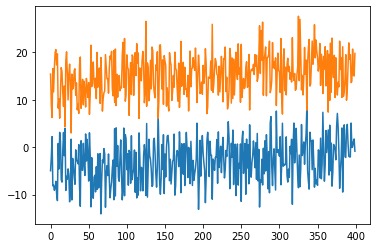

(400, 3)


In [3]:
x, y = create_data(n=400)
plt.plot(y)
plt.show()

print(x.shape)

In [4]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print("x:", x.shape, "y:", y.shape)

x: (400, 3, 1) y: (400, 2)


In [5]:
in_dim = (x.shape[1], x.shape[2])
out_dim = y.shape[1]
print(in_dim)
print(out_dim)

(3, 1)
2


In [6]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape)

xtrain: (340, 3, 1) ytrian: (340, 2)


In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=in_dim, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 17,026
Trainable params: 17,026
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=0)

In [9]:
ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

y1 MSE:1.7521
y2 MSE:1.5164


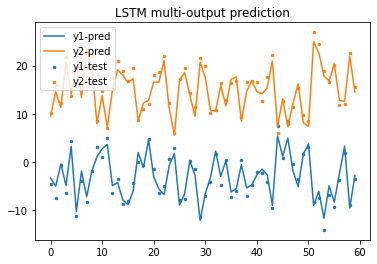

In [10]:
x_ax = range(len(xtest))
plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()